<a href="https://colab.research.google.com/github/devkakeri06/TransfomerFaultPrediction/blob/main/Group_39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Distribution Transformer Theory**
> A distribution transformer is also known as a typical kind of isolation transformer. The main function of this transformer is to alter the high voltage to the normal voltage like 240/120 V to use in electric power distribution. In the distribution system, there are different kinds of transformers available like single phase, 3-phase, underground, pad-mounted, pole-mounted transformer.
- Generally, these transformers are available in different sizes with efficiencies along with insulating oil.
- There are four types of distribution transformer connections available like star-star, delta-delta, star-delta, delta-star and Zig Zag/delta zigzag.

> Transformers plays a very important role in the power system. Though they are some of the most reliable component of the electrical grid they are also prone to failure due to many factors both internal or external. There could be many initiators which cause a transformer failure, but those which can potentially lead to catastrophic failure are the following:
1. Mechanical
2.   Dieletric Failure
3.   Electrical Winding Short-circuit








# Dataset Parameters Overview

- OTI- Oil Temperature Indicator
- WTI- Winding Temperature Indicator
- ATI- Ambient Temperature Indicator
- OLI- Oil Level Indicator
- OTIA- Oil Temperature Indicator Alarm OTIT
- Oil Temperature Indicator Trip
- MOG_A- Magnetic oil gauge indicator

# Objectives


*   Dataset exploration using various types of data visualization.
*   Build various Machine Learning models that can predict the Magnetic oil gauge fault indicator.

# Steps


1.   Import the libraries.
2.   Exploratory Data Analysis (EDA).
3.   Merge and clean the datasets.
4.   Data Visualization.
5.   Train-test split and data normalization.
6.   Implementing Machine Learning Models.
7.   Evaluation and comparison of the models.





# **Importing Libraries**


In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme
sns.set_theme(context='notebook', style='white', palette='deep', font_scale=1.5, color_codes=True)

# Set Matplotlib figure size and background color
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.facecolor'] = '#F0F8FF'

# Set Matplotlib title size
plt.rcParams['axes.titlesize'] = 25

# Set Matplotlib axis and label properties
plt.rcParams['axes.edgecolor'] = 'pink'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 20

# Set Matplotlib tick properties
plt.rcParams['xtick.color'] = '#A52A2A'
plt.rcParams['ytick.color'] = '#A52A2A'

# Set Matplotlib grid properties
plt.rcParams['grid.color'] = 'green'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.alpha'] = 0.3

# Set Matplotlib legend properties
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.facecolor'] = 'NavajoWhite'
plt.rcParams['legend.edgecolor'] = 'pink'
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.fontsize'] = 20

# Set font size
plt.rcParams['font.size'] = 14

# Set figure DPI and edge color
plt.rcParams['figure.dpi'] = 50
plt.rcParams['figure.edgecolor'] = 'Blue'

pd.set_option('display.max_columns',None)


# **Exploratory Data Analysis**

In [ ]:
tf = pd.read_csv('Overview.csv')

# convert to datetime datatype
tf['DeviceTimeStamp'] = pd.to_datetime(tf['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')

display(tf.shape)
tf.head()

(20316, 8)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25 13:06:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25 13:09:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27 10:49:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27 10:51:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [ ]:
cv = pd.read_csv('CurrentVoltage.csv')

# convert to datetime datatype
cv['DeviceTimeStamp'] = pd.to_datetime(cv['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')

display(cv.shape)
cv.head()

(19352, 11)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# merge the datasets

cv['DeviceTimeStamp'] = pd.to_datetime(cv['DeviceTimeStamp'],format = '%Y-%m-%d %H:%M:%S')
transformer = pd.merge(tf, cv, on='DeviceTimeStamp')
transformer.sample(5)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
2373,2019-07-05 11:15:00,29.0,0.0,29.0,40.0,0.0,0.0,0.0,242.1,242.2,242.2,0.2,0.0,0.0,0.0,0.0,0.0,0.2
14389,2020-01-17 15:38:00,33.0,0.0,29.0,100.0,0.0,0.0,0.0,248.7,249.1,247.1,86.5,50.5,88.5,430.9,428.6,431.4,37.0
5696,2019-08-21 11:45:00,42.0,0.0,35.0,40.0,0.0,0.0,0.0,229.4,227.7,229.2,117.5,110.4,135.3,395.5,395.2,398.9,21.9
3606,2019-07-24 23:15:00,31.0,0.0,28.0,40.0,0.0,0.0,1.0,233.2,232.3,234.1,111.4,93.2,111.9,402.6,403.7,406.1,18.4
1834,2019-06-29 14:59:00,33.0,0.0,33.0,39.0,0.0,0.0,0.0,242.9,243.0,243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Data Visualization**

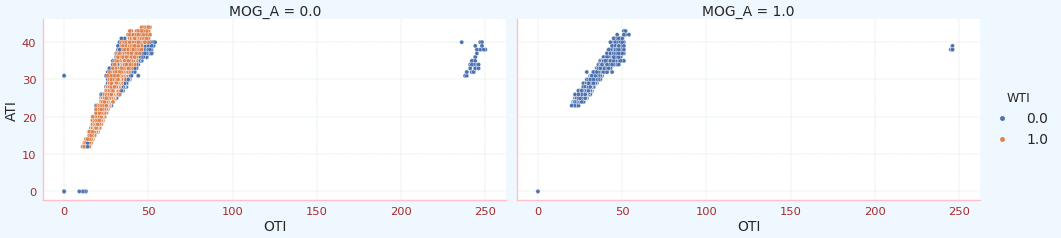

In [ ]:
sns.relplot(data=tf, x="OTI", y="ATI", hue="WTI",col="MOG_A", aspect=2);

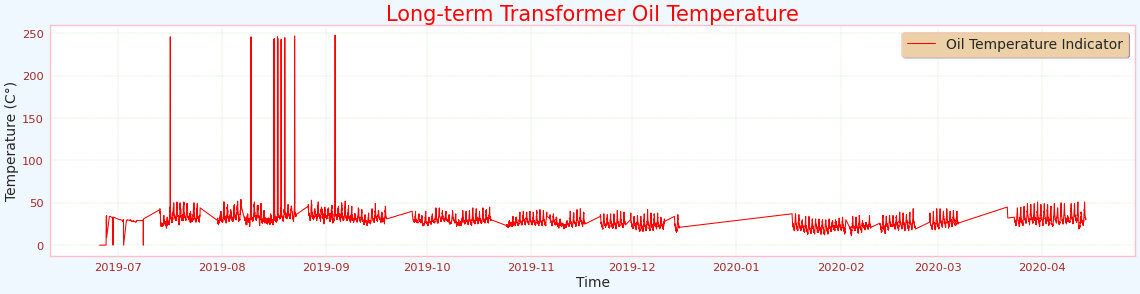

In [ ]:
plt.figure(figsize=(28,6))

plt.plot(transformer.DeviceTimeStamp, transformer.OTI, label="Oil Temperature Indicator",color='red')
plt.title("Long-term Transformer Oil Temperature",fontsize= 30,color='Red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (C°)")
plt.show()

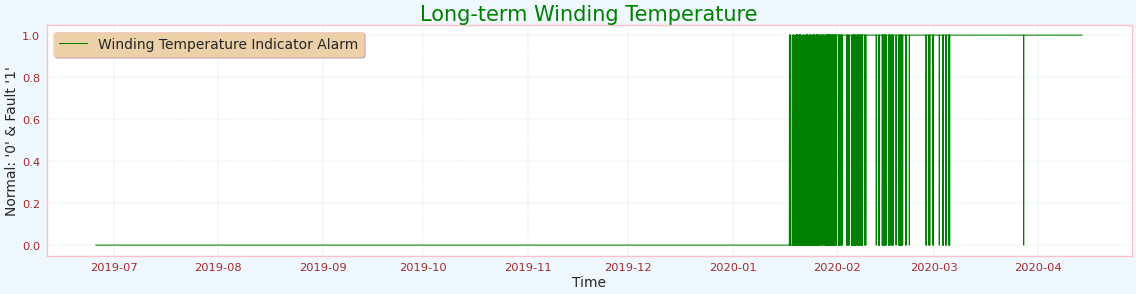

In [ ]:
plt.figure(figsize=(28,6))

plt.plot(transformer.DeviceTimeStamp, transformer.WTI, label="Winding Temperature Indicator Alarm",color='green')
plt.title("Long-term Winding Temperature",fontsize = 30,color='Green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show()

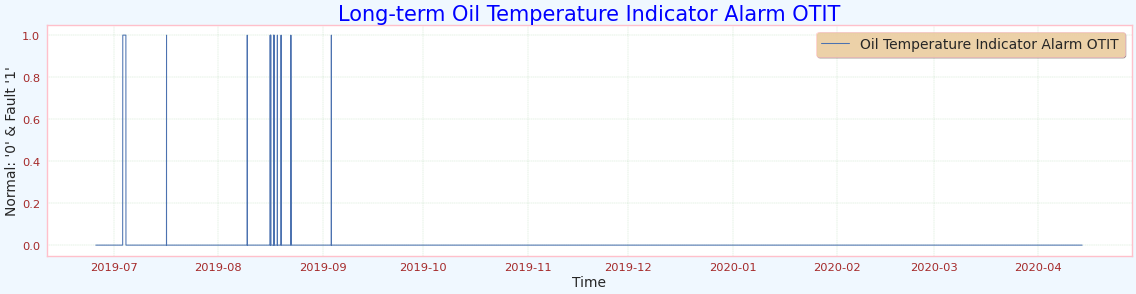

In [ ]:
plt.figure(figsize=(28, 6))
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_A, label="Oil Temperature Indicator Alarm OTIT")
plt.title("Long-term Oil Temperature Indicator Alarm OTIT",fontsize = 30,color='Blue')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show()

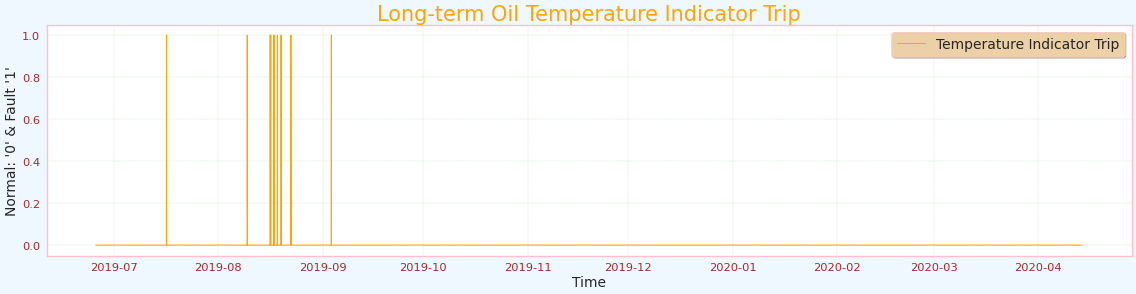

In [ ]:
plt.figure(figsize=(28, 6))
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_T, label="Temperature Indicator Trip",color='Orange')
plt.title("Long-term Oil Temperature Indicator Trip",fontsize = 30,color='Orange')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show()

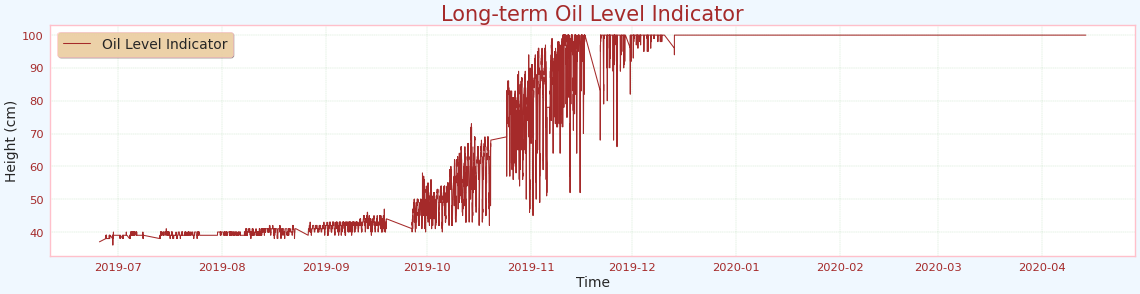

In [ ]:
plt.figure(figsize=(28, 6))
plt.plot(transformer.DeviceTimeStamp, transformer.OLI, label="Oil Level Indicator",color='Brown')
plt.title("Long-term Oil Level Indicator",fontsize = 30,color='Brown')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show()

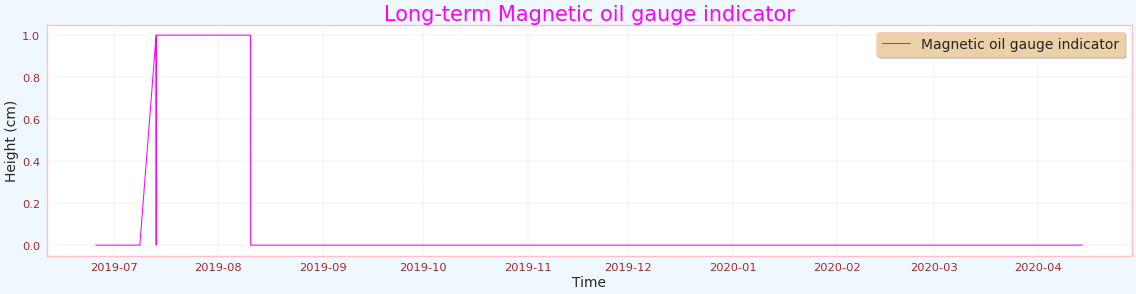

In [ ]:
plt.figure(figsize=(28,6))

plt.plot(transformer.DeviceTimeStamp, transformer.MOG_A, label="Magnetic oil gauge indicator",color='Magenta')
plt.title("Long-term Magnetic oil gauge indicator",fontsize = 30,color='Magenta')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show()

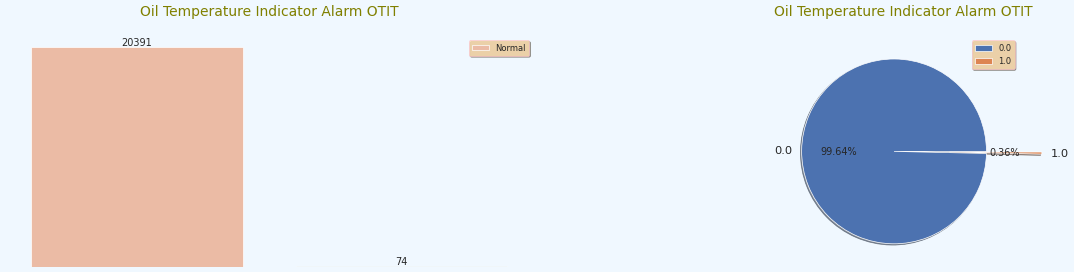

In [ ]:
plt.rcParams['legend.fontsize'] = 12
plt.rcParams["axes.labelsize"] = 20

plt.figure(figsize=(30, 6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_A', data=transformer, palette='RdBu')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Alarm OTIT", fontsize=20,color='Olive',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['OTI_A'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Alarm OTIT", fontsize = 20,color='Olive',pad= 30);
plt.legend()
plt.axis('off');

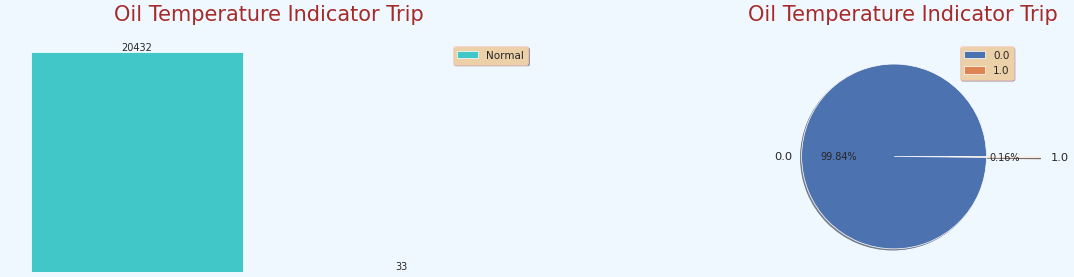

In [ ]:
plt.rcParams['legend.fontsize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelcolor"] = 'brown'

plt.figure(figsize=(30,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_T', data=transformer, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Trip", fontsize=30,color='Brown',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['OTI_T'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Trip", fontsize = 30,color='Brown',pad= 30);
plt.legend()
plt.axis('off');

(-1.25, 1.25, -1.25, 1.25)

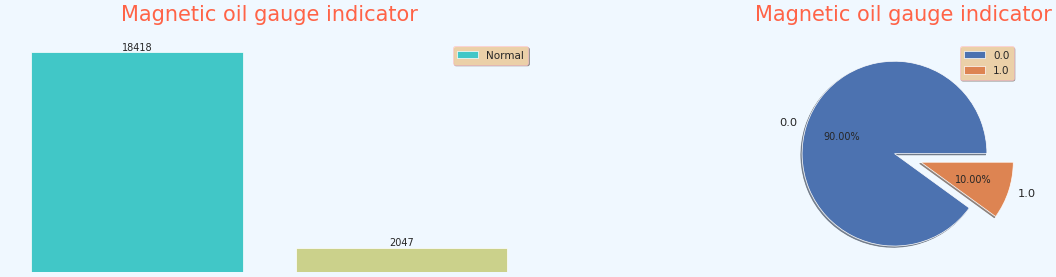

In [ ]:
plt.figure(figsize=(30,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='MOG_A', data=transformer, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Magnetic oil gauge indicator", fontsize=30,color='Tomato',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['MOG_A'].value_counts().plot.pie(explode=[0.1, 0.2],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Magnetic oil gauge indicator", fontsize = 30,color='Tomato',pad= 30);
plt.legend()
plt.axis('off')

## **Train-test split and data normalization**

In [ ]:
X = transformer.drop(['DeviceTimeStamp','MOG_A'],axis=1)
y = transformer['MOG_A']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Implementing Machine Learning Models**



# **1. Logistic Regression**

Training Accuracy    : 94.22 %
Model Accuracy Score : 94.28 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      3684
         1.0       0.91      0.47      0.62       409

    accuracy                           0.94      4093
   macro avg       0.93      0.73      0.80      4093
weighted avg       0.94      0.94      0.93      4093

--------------------------------------------------------


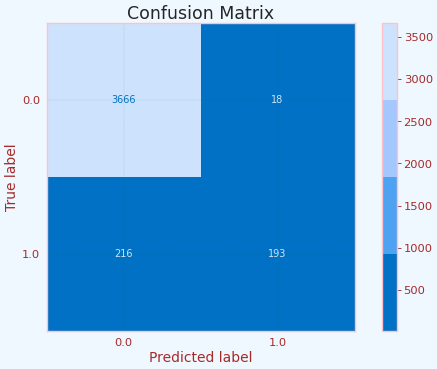

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Define a custom colormap with varied colors
cmap = ListedColormap(['#0071C5', '#4EA2F2', '#A4C8FD', '#CDE3FD'])



logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=cmap)
plt.title('Confusion Matrix')
plt.show()


# **2. Support Vector Machine (SVM)**

Training Accuracy    : 95.41 %
Model Accuracy Score : 95.55 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      3684
         1.0       0.90      0.63      0.74       409

    accuracy                           0.96      4093
   macro avg       0.93      0.81      0.86      4093
weighted avg       0.95      0.96      0.95      4093

--------------------------------------------------------


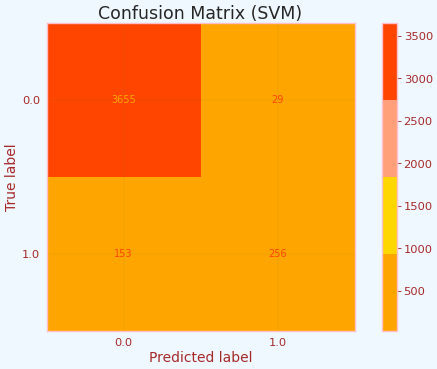

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap with varied colors
cmap = ListedColormap(['#FFA500', '#FFD700', '#FFA07A', '#FF4500'])


# Create and fit the SVM model
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap=cmap)
plt.title('Confusion Matrix (SVM)')
plt.show()


Training Accuracy    : 100.00%
Model Accuracy Score : 99.00%
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3684
         1.0       0.95      0.95      0.95       409

    accuracy                           0.99      4093
   macro avg       0.97      0.97      0.97      4093
weighted avg       0.99      0.99      0.99      4093

--------------------------------------------------------


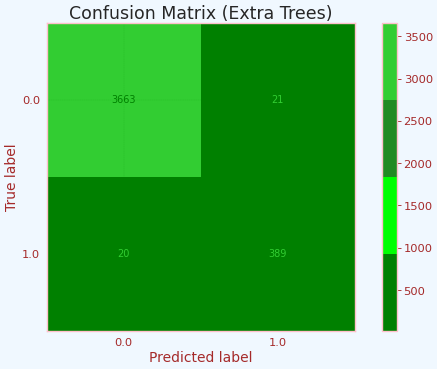

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap with varied colors
cmap = ListedColormap(['#008000', '#00FF00', '#228B22', '#32CD32'])


# Create an Extra Trees classifier with the desired number of estimators
et = ExtraTreesClassifier(n_estimators=100)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

et_train = round(et.score(X_train, y_train) * 100, 2)
et_accuracy = round(accuracy_score(y_pred_et, y_test) * 100, 2)

print("Training Accuracy    : {:.2f}%".format(et_train))
print("Model Accuracy Score : {:.2f}%".format(et_accuracy))
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_et))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_et)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=et.classes_)
disp.plot(cmap=cmap)
plt.title('Confusion Matrix (Extra Trees)')
plt.show()


# **Evaluating and Comparing different models**

In [ ]:
models = pd.DataFrame({
    'Model': [
         'Logistic Regression','Support Vector Machines'
    ],
    'Training Accuracy': [
        log_train, svc_train
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy
    ]
})

In [ ]:
import pandas as pd

# Set the precision option
# pd.set_option('precision', 2)

# Sort the DataFrame and style it
styled_df = models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
    cmap='coolwarm').hide_index().set_properties(**{
        'font-family': 'Lucida Calligraphy',
        'color': 'LigntGreen',
        'font-size': '15px'
    })

# Display the styled DataFrame
styled_df


<ipython-input-50-55c5af9418a3>:8: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  cmap='coolwarm').hide_index().set_properties(**{


Model,Training Accuracy,Model Accuracy Score
Support Vector Machines,95.410000,95.550000
Logistic Regression,94.220000,94.280000


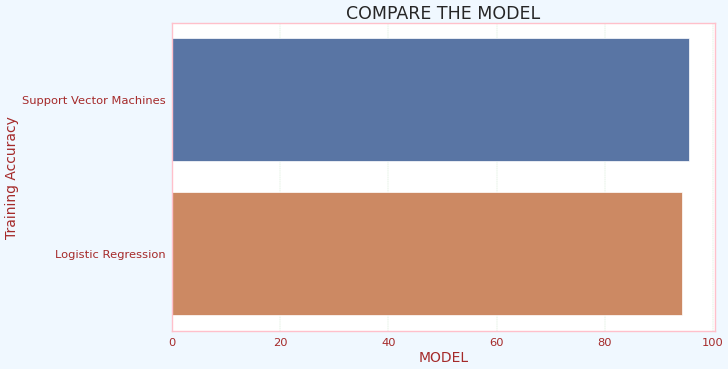

In [ ]:
models=models.sort_values(by='Model Accuracy Score',ascending=False)[:8]

sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');

In [ ]:
prediction = svc.predict(X_test)
print(prediction)

prediction = logreg.predict(X_test)
print(prediction)

[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]


In [ ]:
import pandas as pd

# Assuming you have actual values in y_test
actual_values = y_test

# Predictions for the Support Vector Classifier (SVC)
svc_predictions = svc.predict(X_test)

# Predictions for the Logistic Regression (logreg)
logreg_predictions = logreg.predict(X_test)

# Create a DataFrame
data = {
    'Actual Values': actual_values,
    'SVC Predictions': svc_predictions,
    'Logistic Regression Predictions': logreg_predictions
}

df = pd.DataFrame(data)

# Display the DataFrame
print("First 50 Rows:")
print(df.head(50))

# Print the last 50 rows
print("Last 50 Rows:")
print(df.tail(50))

First 50 Rows:
       Actual Values  SVC Predictions  Logistic Regression Predictions
7710             0.0              0.0                              0.0
11744            0.0              0.0                              0.0
4267             1.0              1.0                              1.0
18419            0.0              0.0                              0.0
196              0.0              0.0                              0.0
1165             0.0              0.0                              0.0
6349             0.0              0.0                              0.0
1773             0.0              0.0                              0.0
13517            0.0              0.0                              0.0
18513            0.0              0.0                              0.0
2858             1.0              0.0                              0.0
4608             1.0              0.0                              0.0
14939            0.0              0.0                         